## THIS NOTEBOOK FOLLOW THIS LINK
http://gouthamanbalaraman.com/blog/european-option-binomial-tree-quantlib-python.html

In [1]:
import QuantLib as ql # version 1.5
import matplotlib.pyplot as plt
%matplotlib inline

### Compute the price of a sample European Option 

In [2]:
K=200    #spot price
St=208   #current stock price
r=4      #4% risk free rate
t=30     #time to expiry, 30 days 
v=20     #volatility 


# option data

maturity_date = ql.Date(1, 3, 2022)
spot_price = St
strike_price = K
volatility = v/100
dividend_rate = 0


option_type = ql.Option.Call

# risk_free_rate = 0.001
risk_free_rate = r/100

day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(30, 1, 2022)
ql.Settings.instance().evaluationDate = calculation_date

In [3]:
# construct the European Option
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

In [4]:
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts)

In [5]:
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print ("The theoretical price is ", bs_price)
bs_delta = european_option.delta()
print ("The theoretical delta is ", bs_delta)
bs_gamma = european_option.gamma()
print ("The theoretical gamma is ", bs_gamma)
bs_vega = european_option.vega()
print ("The theoretical vega is ", bs_vega)

The theoretical price is  10.210518559926461
The theoretical delta is  0.779359324170194
The theoretical gamma is  0.0248682650888989
The theoretical vega is  17.68603760229241


### Try to plot graphs with different S

In [6]:
import numpy as np


S_min = 100
S_max = 300
S = np.linspace(S_min, S_max, 100)


K=200    #spot price
r=4      #4% risk free rate
t=30     #time to expiry, 30 days 
v=20     #volatility 


maturity_date = ql.Date(1, 3, 2022)
strike_price = K
volatility = v/100
dividend_rate = 0


option_type = ql.Option.Put

# risk_free_rate = 0.001
risk_free_rate = r/100

day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(30, 1, 2022)
ql.Settings.instance().evaluationDate = calculation_date



In [7]:
# construct the European Option
# payoff = ql.PlainVanillaPayoff(option_type, strike_price)
payoff = ql.CashOrNothingPayoff(option_type, strike_price, 50)

exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

In [8]:
option_price = []
option_delta = []
option_gamma = []
option_vega = []

# set a dummy quote u here so thta we will change later
u = ql.SimpleQuote(0)
spot_handle = ql.QuoteHandle(u)
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count))
dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count))
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, volatility, day_count))
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                       dividend_yield, 
                                       flat_ts, 
                                       flat_vol_ts)
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))


for i in S:
    u.setValue(i)
    option_price.append(european_option.NPV())
    option_delta.append(european_option.delta())
    option_gamma.append(european_option.gamma())
    option_vega.append(european_option.vega())


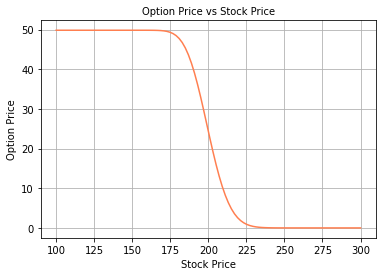

In [9]:
plt.plot(S,option_price, color='coral')

plt.grid()

#plt.xlim(S_min,S_max)
#plt.ylim(0,100)

plt.title('Option Price vs Stock Price',fontsize=10)

plt.xlabel('Stock Price')
plt.ylabel('Option Price')

plt.show()  

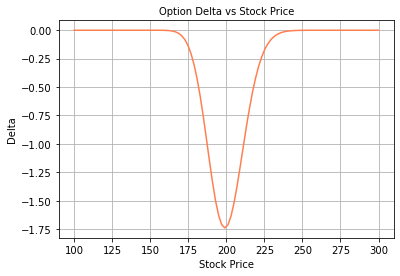

In [10]:
plt.plot(S,option_delta, color='coral')

plt.grid()

#plt.xlim(S_min,S_max)
#plt.ylim(-1,1)

plt.title('Option Delta vs Stock Price',fontsize=10)

plt.xlabel('Stock Price')
plt.ylabel('Delta')

plt.show()  

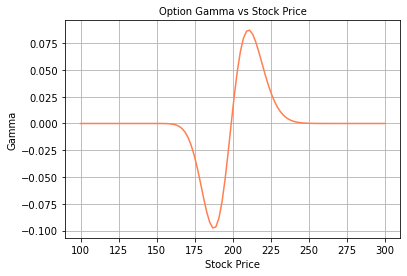

In [11]:
plt.plot(S,option_gamma, color='coral')

plt.grid()

#plt.xlim(S_min,S_max)
#plt.ylim(-0.2,0.2)

plt.title('Option Gamma vs Stock Price',fontsize=10)

plt.xlabel('Stock Price')
plt.ylabel('Gamma')

plt.show()  

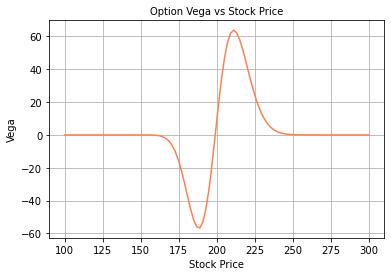

In [12]:
plt.plot(S,option_vega, color='coral')

plt.grid()

#plt.xlim(S_min,S_max)
#plt.ylim(-50,50)

plt.title('Option Vega vs Stock Price',fontsize=10)

plt.xlabel('Stock Price')
plt.ylabel('Vega')

plt.show()  